In [9]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
# hyper parameters
input_size = 784 # 28 x 28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# Data Loader and Transformation

In [11]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [16]:
examples = iter(train_loader)
samples, labels = examples.next()
print(f'samples shape: {samples.shape}, labels shape: {labels.shape}')

samples shape: torch.Size([100, 1, 28, 28]), labels shape: torch.Size([100])


<function matplotlib.pyplot.show(*args, **kw)>

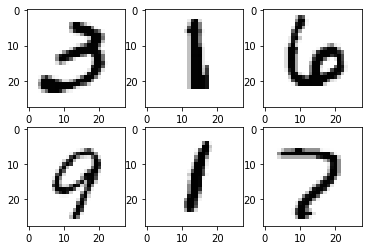

In [18]:
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap='Greys')
plt.show

# Multilayer NN

In [19]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()

    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)
  
  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes)

In [20]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)
    #backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch + 1} / {num_epochs}, step {i+1} / {n_total_steps}, loss {loss.item():4f}')

epoch 1 / 2, step 100 / 600, loss 0.390874
epoch 1 / 2, step 200 / 600, loss 0.423736
epoch 1 / 2, step 300 / 600, loss 0.272508
epoch 1 / 2, step 400 / 600, loss 0.286641
epoch 1 / 2, step 500 / 600, loss 0.182208
epoch 1 / 2, step 600 / 600, loss 0.198181
epoch 2 / 2, step 100 / 600, loss 0.493845
epoch 2 / 2, step 200 / 600, loss 0.279412
epoch 2 / 2, step 300 / 600, loss 0.265461
epoch 2 / 2, step 400 / 600, loss 0.326787
epoch 2 / 2, step 500 / 600, loss 0.280486
epoch 2 / 2, step 600 / 600, loss 0.223215


In [23]:
# test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

acc = 100.0 * n_correct / n_samples
print(acc)
  

95.01
